<a href="https://colab.research.google.com/github/poorviratre21/EDA-Capston-Project-On-Google-Play-Store-Analysis/blob/main/Copy_of_4_3c_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Importing necessary libraries :-**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean,median
from datetime import datetime
from datetime import date
%matplotlib inline

# **Mounting** **Drive :-**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Directing the file path for both the data i.e., playstore data csv and user review csv :- 

In [ ]:
# Directing the file path of play store data csv:-
path_playstore_data = "/content/drive/MyDrive/AlmaBetter/eda_capston (play store app analysis)/Copy of Play Store Data.csv"
df = pd.read_csv(path_playstore_data)

In [ ]:
# Directing the file path of user review data csv:-
path_user_review = "/content/drive/MyDrive/AlmaBetter/eda_capston (play store app analysis)/Copy of User Reviews.csv"
df2 = pd.read_csv(path_user_review)

Performing functions on the first dataframe i.e df (Playstore app data)

**DESCRIPTION OF DATA**

In [ ]:
# Analysing data through head function upto 10 rows:-
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
# Analysing the dataframe through tail function:-
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# Cheking the shape of dataframe:-
df.shape

(10841, 13)

In [ ]:
# Cheking the size of dataframe:-
df.size

140933

In [ ]:
# Cheking the number of columns present in dataframe:-
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Cheking the information of dataframe:-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Analysing the numeric value present in dataframe:-  
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
# Checking the Null values (NaN):-
df.isna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# To check sum of the null values present in dataframe:-
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# just to check the null values in Rating of index 23
df.loc[23]

App                        Mcqueen Coloring pages
Category                           ART_AND_DESIGN
Rating                                        NaN
Reviews                                        61
Size                                         7.0M
Installs                                 100,000+
Type                                         Free
Price                                           0
Content Rating                           Everyone
Genres            Art & Design;Action & Adventure
Last Updated                        March 7, 2018
Current Ver                                 1.0.0
Android Ver                            4.1 and up
Name: 23, dtype: object

Performing functions on the second dta frame that is df2.

In [ ]:
# Analysing head :-
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# Analysing tail :-
df2.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
# Analysing shape :-
df2.shape

(64295, 5)

In [ ]:
# Analysing size :-
df2.size

321475

In [ ]:
# To get info :-
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# To get the description of the dataframe of user review :-
df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
# Checking for the null values :-
df2.isna()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,True,True,True
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
64290,False,True,True,True,True
64291,False,True,True,True,True
64292,False,True,True,True,True
64293,False,True,True,True,True


In [ ]:
# Checking for the sum of null values :-
df2.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
# Checking dtypes :-
df2.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

# ***DATA CLEANUP***

1. a) Drop the records where rating is missing in our target/study variable

In [ ]:
# to detect non-missing values for an array-like object using notna() :-
df = df[df["Rating"].notna()]

In [ ]:
# now checking the null values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [ ]:
# To check the dropped value in rating of index 23 :-
#df.loc[23] # The error shows that the value has beeen dropped.

b) checking the null values for Android Ver column.



In [ ]:
# To detect missing values in the given series object using isna():-
df[df["Android Ver"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


i) Note that first two rows has missing values and the third row has misplaced values.

**ii**) Dropping the third record i.e.,"Life Made WI-Fi Touchscreen Photo Frame	"

In [ ]:
# Dropping the third row:-
df.drop(10472, inplace = True)

In [ ]:
# To check if the value has been dropped:-
df[df["Android Ver"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


iii) Replacing the remaining missing values with mode ( most frequent value)

In [ ]:
# Filling the nan value with the mode:-
df["Android Ver"].fillna(df["Android Ver"].mode, inplace = True)

In [ ]:
# Detecting the missing values results into no rows mentioned:-
df[df["Android Ver"].isna()]     

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
# To check, if any null values are present in dataframe using sum():-
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

c) Current Var :- replace with most common values

In [ ]:
df["Current Ver"].fillna(df["Current Ver"].mode, inplace = True)

In [ ]:
# To check, if any null values are present in dataframe using sum():-
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Checking the dtype of the data

In [ ]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**2. Data clean up - correcting the datatypes**

a) Which all variables need to be brought to numeric types?

Reviews	

Size 

Installs 

Price

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Size variable :- remove M & k and convert them to float :-

In [ ]:
# Removing M :-
df["Size"] = df["Size"].str.replace("M","")

In [ ]:
# Removing k :-
df["Size"] = df["Size"].str.replace("k","")

In [ ]:
# Use 'pd.to_numeric' in order to convert the strings :-
# By setting errors=’coerce’, you’ll transform the non-numeric values into NaN :-
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [ ]:
# Noticing that the string values is now converted into NaN values :-
df.loc[50:80,["Size"]]

,Size
50,56.0
51,57.0
52,NaN
53,35.0
54,33.0
55,33.0
56,5.6
57,54.0
58,201.0
59,3.6


In [ ]:
# regex is a special sequence of characters used to form a search pattern using a specialized syntax.
df = df.replace(np.nan, 0, regex = True)

In [ ]:
#Changing the dtype of variable Size
df = df.astype({'Size' : float})

In [ ]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Installs variable :- remove + and ,  and convert to float

In [ ]:
# Removing '+' :-
df["Installs"] = df["Installs"].str.replace("+","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
# Removing ',' :-
df["Installs"] = df["Installs"].str.replace(",","")

In [ ]:
# Converting the dtype object to dtype float :-
df = df.astype({'Installs' : float})

In [ ]:
# Checking the dtype :-
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs          float64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Price variable :- removing $ and convert to float

In [ ]:
# Removing '$' :-
df["Price"] = df["Price"].str.replace("$","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
# Converting the dtype object to dtype float :-
df = df.astype({'Price' : float})

In [ ]:
# Checking the dtype :-
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Reviews variable

In [ ]:
# Changing the dtype into float :-
df = df.astype({'Reviews' : float})

In [ ]:
# Checking the dtype :-
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Covert Last Updated column into datetime dtype :-

In [ ]:
# Removing "," :-
df["Last Updated"] = df["Last Updated"].str.replace(",","")

In [ ]:
# Converting the string into datetime :-
df["Last Updated"] = pd.to_datetime(df["Last Updated"])

In [ ]:
# Checking the dtype :-
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                 float64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

**3. Sanity checks - check the following and convert the following**

a) Average rating should be between 1 and 5, as only these values are allowed on the playstore :-

In [ ]:
# Checking the rating between 0 to 5 :-
df["Rating"].min()

1.0

In [ ]:
df["Rating"].max()

5.0

b) Reviews should not be more than installs as only those who installed can review the app

In [ ]:
# ex variables will call the value which reviews are greater than the installs :-
ex = df[df["Reviews"]>df["Installs"]]
ex

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25.0,1.0,Free,0.00,Everyone,Medical,2018-08-02,1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,0.0,10000.0,Paid,2.49,Everyone,Lifestyle,2018-07-30,Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2.0,20.0,1.0,Paid,1.49,Everyone,Arcade,2017-02-08,1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19.0,5.0,Free,0.00,Everyone,Arcade,2018-07-23,1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6.1,10.0,Free,0.00,Everyone,Arcade,2017-03-11,0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4.2,10.0,Free,0.00,Teen,Social,2018-07-23,1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2.0,16.0,1.0,Paid,0.99,Everyone,Arcade,2017-03-03,1.0,2.3 and up


In [ ]:
# Checing index of ex :-
ex.index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [ ]:
# Dropping the index :-
df = df.drop(ex.index)

In [ ]:
# Checking the reviews more than installs again :-
df[df["Reviews"]>df["Installs"]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


**4. Identify and Handle the Outliers :-**

a) Price column

In [ ]:
# Make suitable plot to identify outlier in price :-
paid_apps = df[df["Price"] > 0]
sns.set(rc={'figure.figsize':(8,8)})

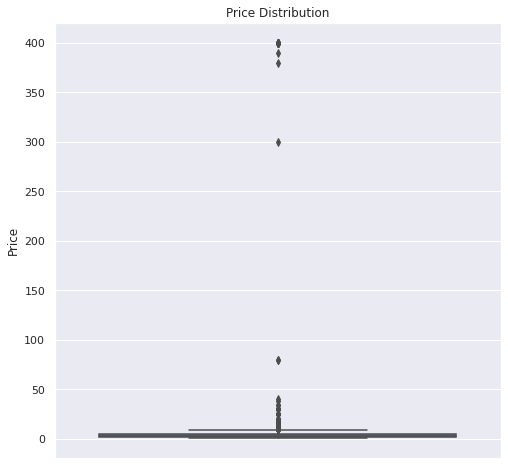

In [ ]:
g = sns.boxplot(y = paid_apps["Price"])
plt.title("Price Distribution")
plt.show()

In [ ]:
df["Reviews"].max()

78158306.0

In [ ]:
df["Reviews"].min()

1.0

In [ ]:
#Limit data to apps with < 1 million reviews :-
outlie = df[df["Reviews"] > 1000000]
outlie

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724.0,0.0,1.000000e+08,Free,0.0,Teen,Books & Reference,2018-08-01,Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,0.0,1.000000e+09,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730.0,0.0,1.000000e+07,Free,0.0,Everyone,Business,2018-08-03,Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861.0,35.0,1.000000e+08,Free,0.0,Everyone,Business,2018-08-02,9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184.0,0.0,5.000000e+07,Free,0.0,Everyone,Business,2018-08-02,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923.0,25.0,1.000000e+07,Free,0.0,Teen,Simulation,2018-06-11,1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800.0,0.0,5.000000e+07,Free,0.0,Everyone,Business,2018-08-06,Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114.0,53.0,1.000000e+08,Free,0.0,Teen,Action,2018-08-03,1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833.0,12.0,1.000000e+07,Free,0.0,Teen,Action,2013-10-28,3.0.3,2.1 and up


In [ ]:
# Getting the index of outlie and dropping it :-
df = df.drop(outlie.index)

In [ ]:
# Checking that if the data becomes limited :-
df["Reviews"].max()     # Now the data is limited.

995002.0

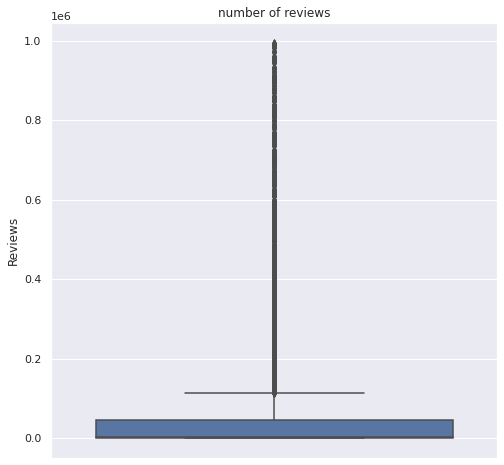

In [ ]:
#Plotting to check the the no. of reviews :-
g  = sns.boxplot(y = df["Reviews"])
plt.title("number of reviews")
plt.show()

# ***DATA VISUALIZATION FOR BUSINESS OPERATIONS***



In [ ]:
#initializing the installs, price, reviews as x, y, z
g = df.groupby("Category")
x = g["Installs"].agg(np.mean)
y = g["Price"].agg(np.sum)
z = g["Reviews"].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         2.003760e+06
AUTO_AND_VEHICLES      7.278055e+05
BEAUTY                 6.408619e+05
BOOKS_AND_REFERENCE    3.570642e+06
BUSINESS               2.321370e+06
COMICS                 6.435018e+05
COMMUNICATION          5.490930e+06
DATING                 1.355360e+06
EDUCATION              2.934367e+06
ENTERTAINMENT          7.994000e+06
EVENTS                 3.544313e+05
FAMILY                 2.160632e+06
FINANCE                2.668574e+06
FOOD_AND_DRINK         2.371755e+06
GAME                   5.124838e+06
HEALTH_AND_FITNESS     4.237307e+06
HOUSE_AND_HOME         2.218184e+06
LIBRARIES_AND_DEMO     9.551231e+05
LIFESTYLE              1.346939e+06
MAPS_AND_NAVIGATION    2.304769e+06
MEDICAL                1.524515e+05
NEWS_AND_MAGAZINES     1.980710e+07
PARENTING              6.223222e+05
PERSONALIZATION        2.289332e+06
PHOTOGRAPHY            7.446603e+06
PRODUCTIVITY           1.543334e+07
SHOPPING               5.830989e+06
SOCIAL             

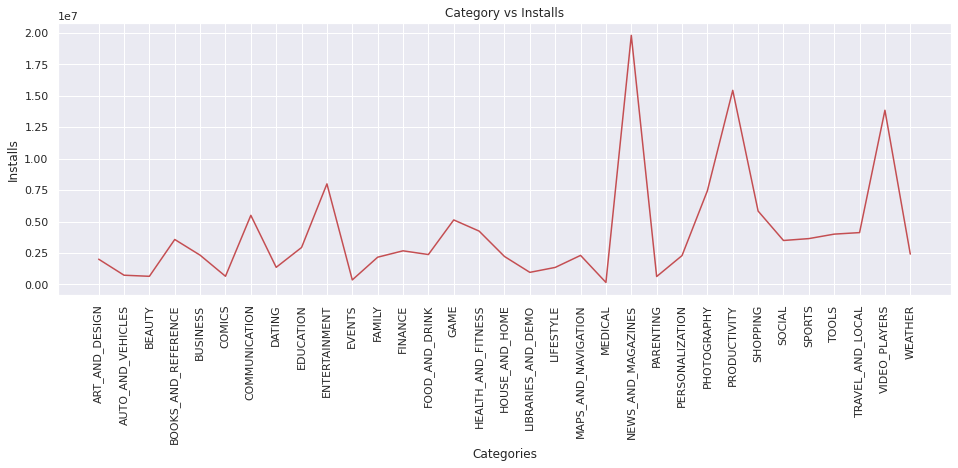

In [ ]:
# plotting graph of category vs intalls
plt.figure(figsize = (16, 5))
plt.plot(x, color = "r")
plt.xticks(rotation = 90)
plt.title("Category vs Installs")
plt.xlabel("Categories")
plt.ylabel("Installs")
plt.show()

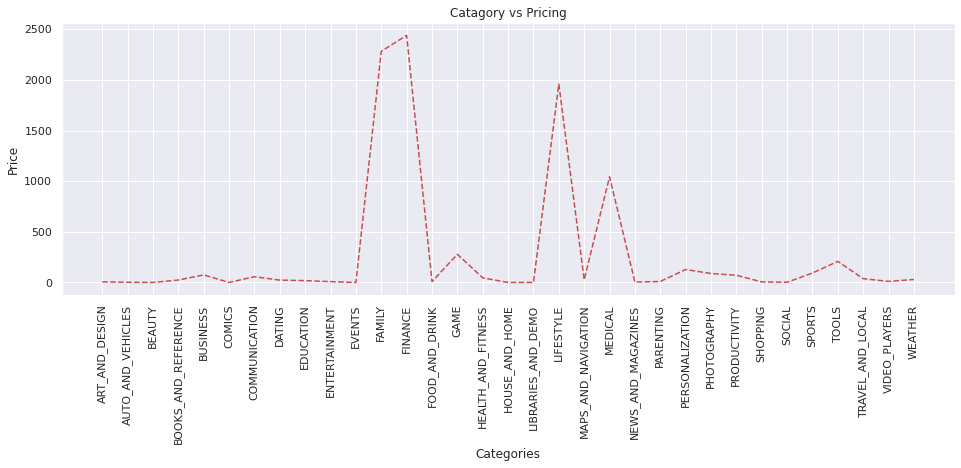

In [ ]:
# plotting graph of category vs pricing
plt.figure(figsize = (16, 5))
plt.plot(y, 'r--', color = 'r')
plt.xticks( rotation = 90)
plt.title("Catagory vs Pricing")
plt.xlabel("Categories")
plt.ylabel("Price")
plt.show()


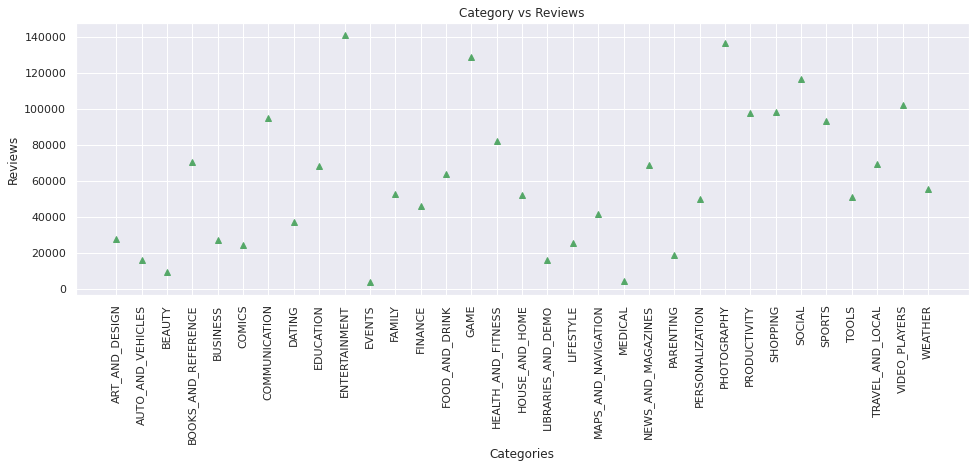

In [ ]:
#plotting graph of category vs reviews
plt.figure(figsize = (16, 5))
plt.plot(z, "g^", color = "g")
plt.xticks( rotation = 90)
plt.title("Category vs Reviews")
plt.xlabel("Categories")
plt.ylabel("Reviews")
plt.show()

Analysing the relationship between the free apps, paid apps and their price

In [ ]:
#Category wise free and paid app installs count
categoty_type_installs_df = df.groupby(['Category','Type'])[['Installs']].sum().unstack().reset_index()
categoty_type_installs_df = categoty_type_installs_df[~categoty_type_installs_df['Installs']['Paid'].isna()].set_index('Category')
categoty_type_installs_df

Installs            
Type                         Free        Paid
Category                                     
ART_AND_DESIGN       1.242171e+08     16000.0
AUTO_AND_VEHICLES    5.307980e+07     50000.0
BOOKS_AND_REFERENCE  6.212690e+08     22650.0
BUSINESS             6.913555e+08    412660.0
COMMUNICATION        1.365882e+09   1360000.0
DATING               2.642740e+08     21100.0
EDUCATION            4.307500e+08    602000.0
ENTERTAINMENT        1.118960e+09    200000.0
FAMILY               3.616433e+09  11268830.0
FINANCE              8.564268e+08    185600.0
FOOD_AND_DRINK       2.537178e+08     60000.0
GAME                 4.324763e+09  21099260.0
HEALTH_AND_FITNESS   1.232483e+09    573000.0
LIFESTYLE            4.163820e+08   1169110.0
MAPS_AND_NAVIGATION  2.741465e+08    121100.0
MEDICAL              5.218898e+07   1016600.0
NEWS_AND_MAGAZINES   4.496205e+09      5500.0
PARENTING            3.106601e+07     50100.0
PERSONALIZATION      6.700944e+08   5258520.0
PHOTOGRAPHY          1.984265e+09   3978520.0
PRODUCTIVITY         4.844659e+09   1410810.0
SHOPPING             1.247821e+09     10100.0
SOCIAL               7.398355e+08      6000.0
SPORTS               1.119888e+09   1243800.0
TOOLS                2.778998e+09   1726820.0
TRAVEL_AND_LOCAL     8.686773e+08    182000.0
VIDEO_PLAYERS        2.021826e+09     71000.0
WEATHER              1.652850e+08    811500.0

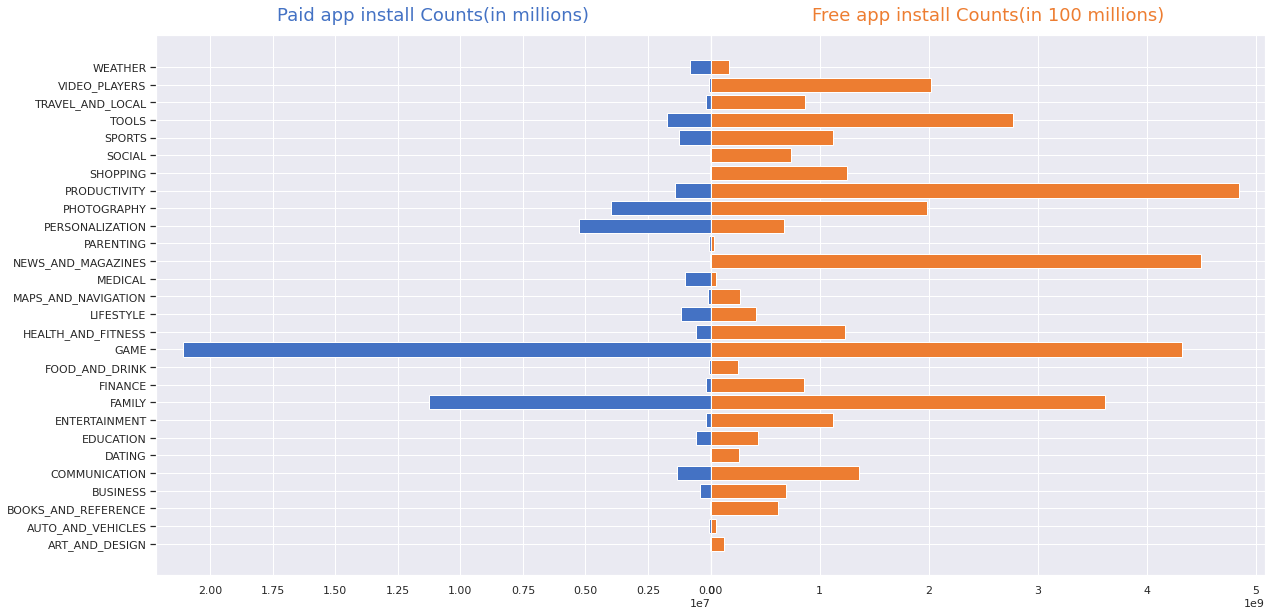

In [ ]:
#Plot between Paid and Free installed app counts
color_red = '#4472c4'
color_blue = '#ed7d31'

ind = categoty_type_installs_df.index
column0 = categoty_type_installs_df['Installs']['Paid']
column1 = categoty_type_installs_df['Installs']['Free']
title0 = 'Paid app install Counts(in millions)'
title1 = 'Free app install Counts(in 100 millions)'

fig, axes = plt.subplots(figsize=(20,10), ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(ind, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red)
axes[1].barh(ind, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue)
    
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 

# To show data from highest to lowest
# plt.gca().invert_yaxis()
axes[0].set(yticks=ind, yticklabels=ind)
axes[0].yaxis.tick_left()

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

Analyse based on the Ratings

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


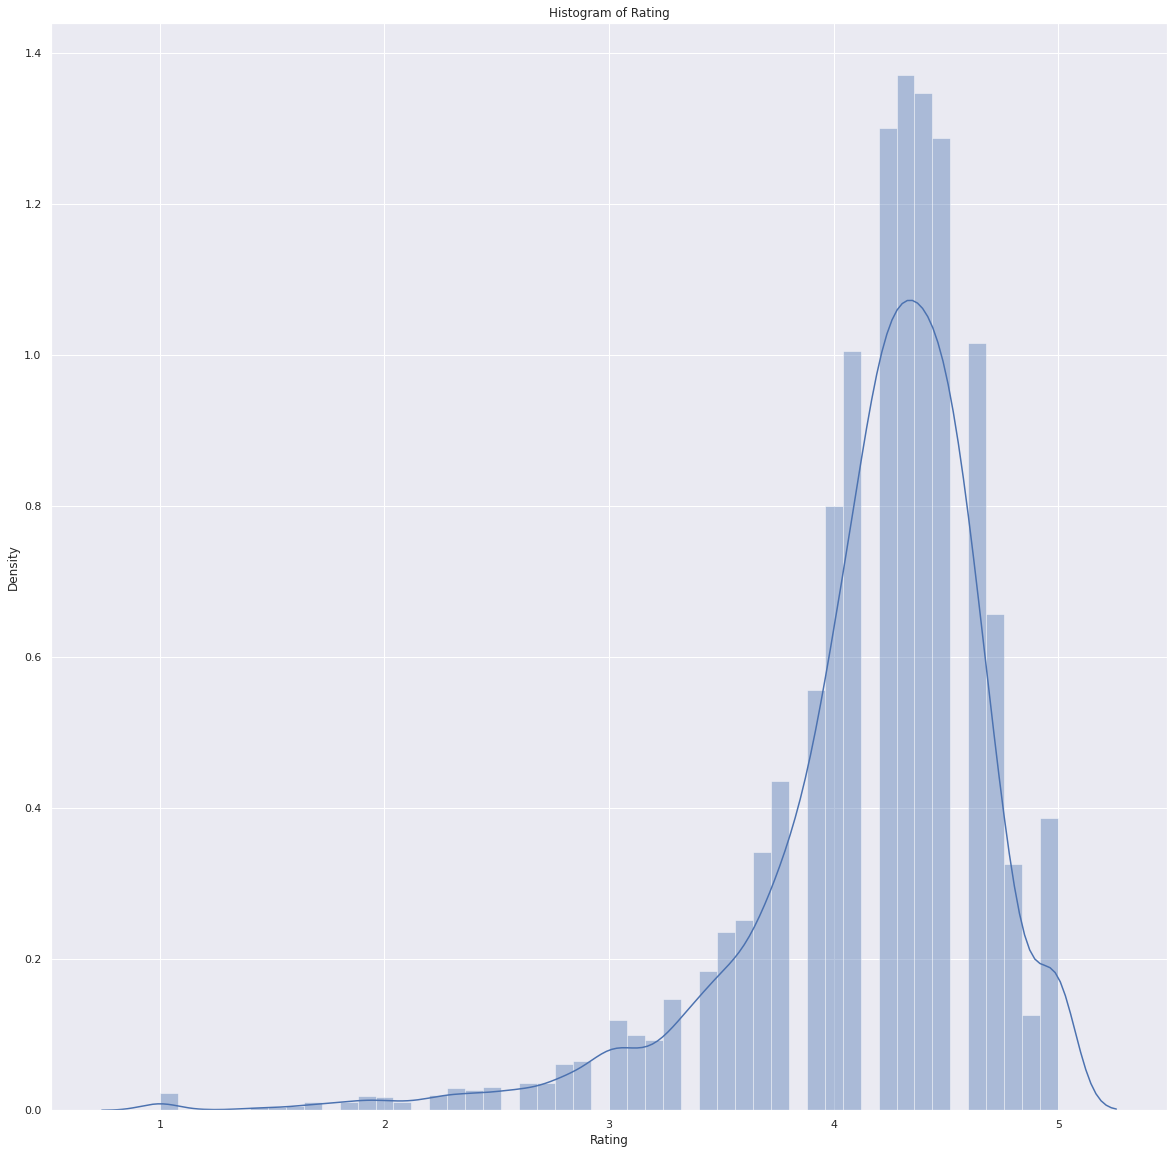

In [ ]:
#Ploting the histogram Rating
rating_df = df[~df['Rating'].isna()]['Rating']

plt.title('Histogram of Rating')
sns.distplot(rating_df, hist=True)

Text(0.5, 0, 'Category')

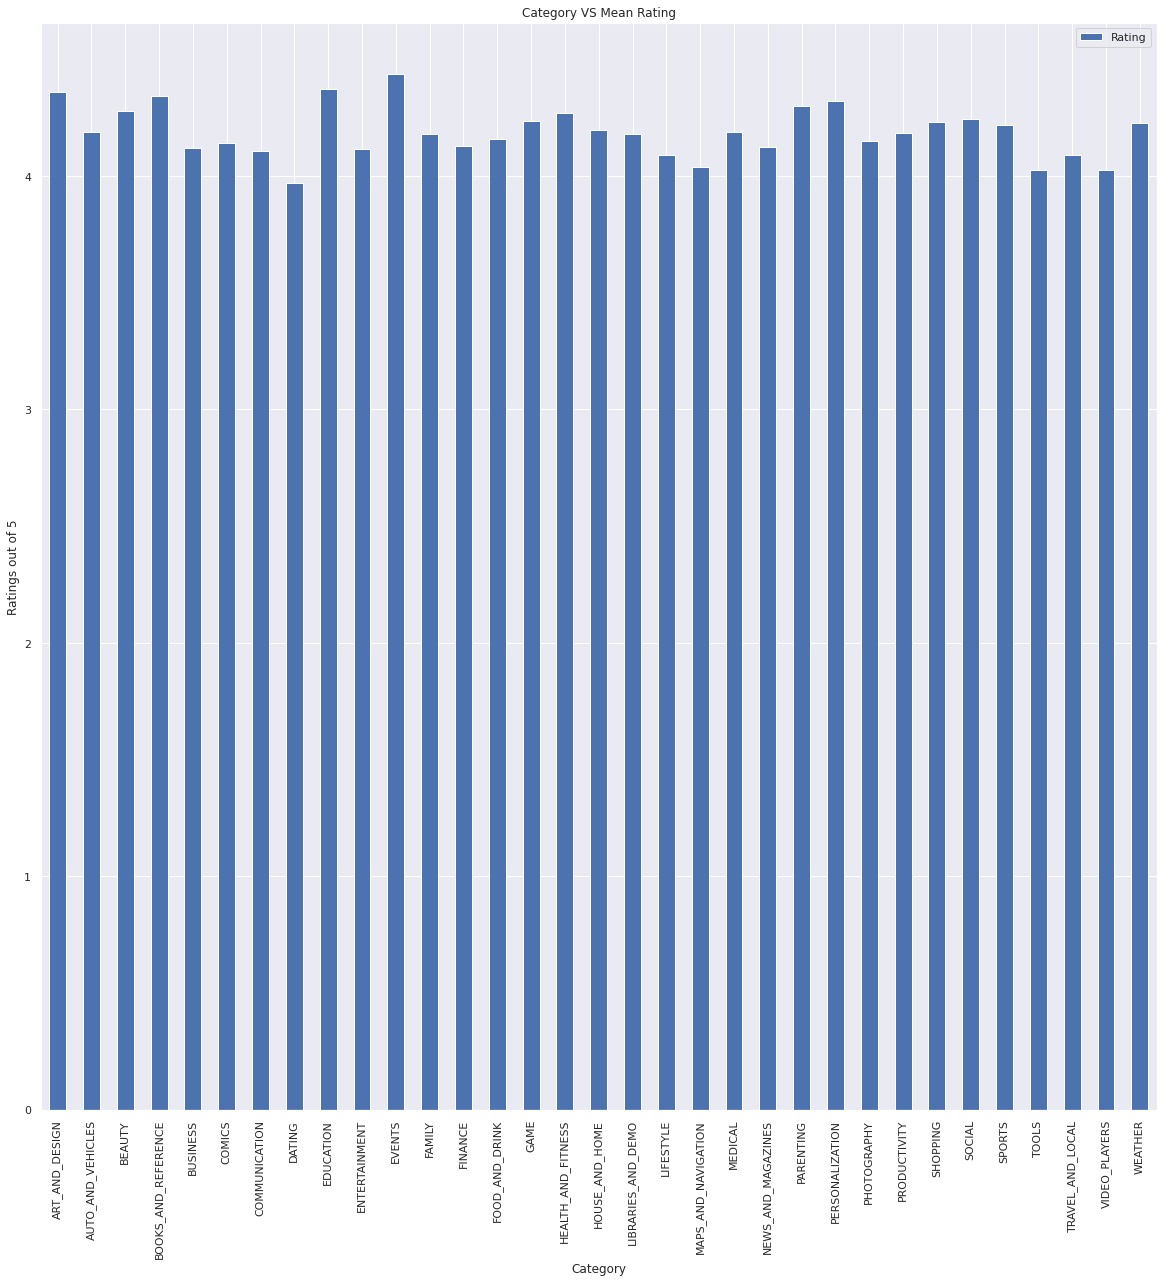

In [ ]:
#ploting Catefgory wise mean Rating
category_mean_rating_df = df.groupby(['Category'])['Rating'].mean().reset_index(name='Rating')
category_mean_rating_df.set_index('Category').plot(kind='bar')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rc('font', size=14) 
plt.xticks(rotation=90)
plt.title('Category VS Mean Rating')
plt.ylabel('Ratings out of 5')
plt.xlabel('Category')

Ratings given by different age of people

In [ ]:
#Ratings given by different age of people
content_rating_df = df['Content Rating'].value_counts()
content_rating_df

Everyone           6963
Teen                934
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

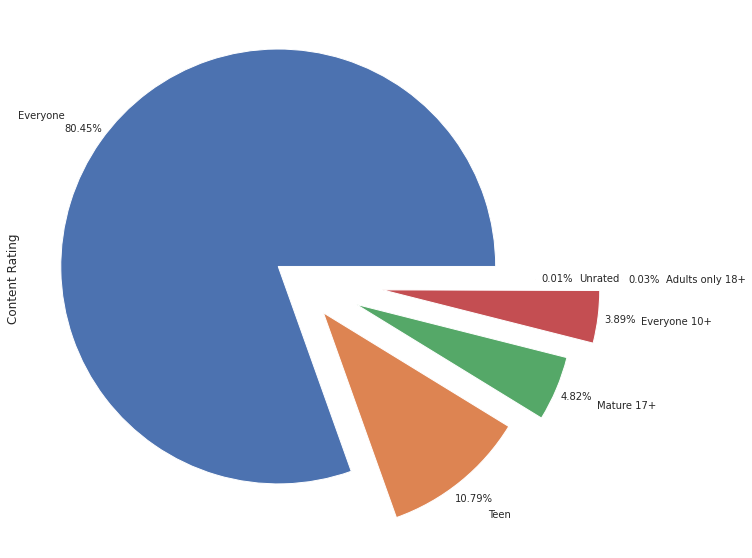

In [ ]:
content_rating_df.plot(kind='pie', fontsize=10, explode= (0.1,0.2,0.3,0.4,0.5,0.1), autopct='%1.2f%%', pctdistance=1.1, labeldistance=1.2)

Top 10 downloaded apps

In [ ]:
#Getting the top downloaded 10 apps and their Ratings vs Reviews
top_downloaded_apps = df.groupby('App').tail(1).sort_values(['Installs','Rating'], ascending=False).head(50)
top_10_downloaded_apps = top_downloaded_apps.head(10).set_index('App')[['Rating','Reviews']].sort_values(['Reviews'])

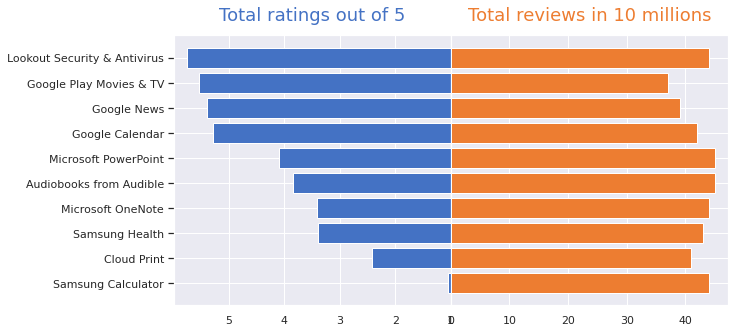

In [ ]:
#Plotting between Top ratting apps and reviews
color_red = '#4472c4'
color_blue = '#ed7d31'

ind = top_10_downloaded_apps.index
column0 = top_10_downloaded_apps['Reviews']
column1 = top_10_downloaded_apps['Rating']
title0 = 'Total ratings out of 5'
title1 = 'Total reviews in 10 millions'

fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(ind, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red)
axes[1].barh(ind, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue)
    
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 

# To show data from highest to lowest
# plt.gca().invert_yaxis()
axes[0].set(yticks=ind, yticklabels=ind)
axes[0].yaxis.tick_left()

axes[0].set_xticklabels([1, 2, 3, 4, 5])
axes[1].set_xticklabels([0, 10, 20, 30, 40, 50])

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

Analysing the user Subjectivity

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity')

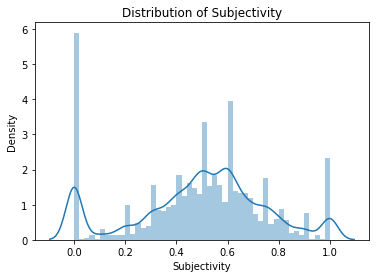

In [ ]:
#Plotting the distribution of Subjectivity
sentiment_subjectivity_df = df2['Sentiment_Subjectivity']
sns.distplot(sentiment_subjectivity_df, hist=True)
plt.xlabel("Subjectivity")
plt.title('Distribution of Subjectivity')

Conclusion :-

The maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.

**Analysing the Relationship between the Sentiment Subjectivity and Sentiment Polarity**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relationship between sentiment_subjectivity and sentiment_polarity')

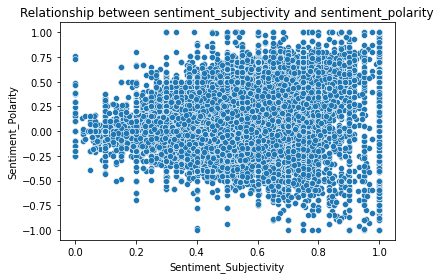

In [ ]:
#Plotting the relationship between sentiment_subjectivity and sentiment_polarity in scatter plot
sns.scatterplot(df2['Sentiment_Subjectivity'], df2['Sentiment_Polarity'])
plt.title("Relationship between sentiment_subjectivity and sentiment_polarity")

Conclusion :-

From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of cases, it shows a proportional behavior when variance is too high or low.

**Sentiment percentage analyse**

In [ ]:
#Counts of Review sentiments
df2['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

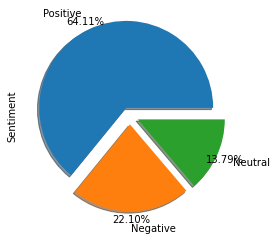

In [ ]:
#Percentage of Review sentiments
df2['Sentiment'].value_counts().plot(kind='pie', explode= (0.1,0.1,0.1), shadow=True, autopct='%1.2f%%', pctdistance=1.1, labeldistance=1.2);